In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [2]:
df=pd.read_csv(r'D:\itvedant\Vscode\housing.csv')

In [3]:
df.head()

,price,area,bedrooms,bathrooms,mainroad,guestroom,basement,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,yes,no,no,yes,2,furnished
1,12250000,8960,4,4,yes,no,no,yes,3,furnished
2,12250000,9960,3,2,yes,no,yes,no,2,semi-furnished
3,12215000,7500,4,2,yes,no,yes,yes,3,furnished
4,11410000,7420,4,1,yes,yes,yes,yes,2,furnished


In [4]:
num_col=df.select_dtypes('Int64')
num_col

,price,area,bedrooms,bathrooms,parking
0,13300000,7420,4,2,2
1,12250000,8960,4,4,3
2,12250000,9960,3,2,2
3,12215000,7500,4,2,3
4,11410000,7420,4,1,2
...,...,...,...,...,...
540,1820000,3000,2,1,2
541,1767150,2400,3,1,0
542,1750000,3620,2,1,0
543,1750000,2910,3,1,0


In [5]:
cat_col=df.select_dtypes('object')
cat_col

,mainroad,guestroom,basement,airconditioning,furnishingstatus
0,yes,no,no,yes,furnished
1,yes,no,no,yes,furnished
2,yes,no,yes,no,semi-furnished
3,yes,no,yes,yes,furnished
4,yes,yes,yes,yes,furnished
...,...,...,...,...,...
540,yes,no,yes,no,unfurnished
541,no,no,no,no,semi-furnished
542,yes,no,no,no,unfurnished
543,no,no,no,no,furnished


In [6]:
df.describe()

,price,area,bedrooms,bathrooms,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,3.000000


In [7]:
df['mainroad'].unique()

array(['yes', 'no'], dtype=object)

In [8]:
df['guestroom'].unique()

array(['no', 'yes'], dtype=object)

In [9]:
df['basement'].unique()

array(['no', 'yes'], dtype=object)

In [10]:
df['airconditioning'].unique()

array(['yes', 'no'], dtype=object)

In [11]:
df.shape

(545, 10)

In [12]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
mainroad            0
guestroom           0
basement            0
airconditioning     0
parking             0
furnishingstatus    0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   mainroad          545 non-null    object
 5   guestroom         545 non-null    object
 6   basement          545 non-null    object
 7   airconditioning   545 non-null    object
 8   parking           545 non-null    int64 
 9   furnishingstatus  545 non-null    object
dtypes: int64(5), object(5)
memory usage: 42.7+ KB


# now check the outliers first and if avaibles then remove all

In [15]:
x=df.drop('price',axis=1)
y=df['price']

In [16]:
num_col

,price,area,bedrooms,bathrooms,parking
0,13300000,7420,4,2,2
1,12250000,8960,4,4,3
2,12250000,9960,3,2,2
3,12215000,7500,4,2,3
4,11410000,7420,4,1,2
...,...,...,...,...,...
540,1820000,3000,2,1,2
541,1767150,2400,3,1,0
542,1750000,3620,2,1,0
543,1750000,2910,3,1,0


<function matplotlib.pyplot.show(close=None, block=None)>

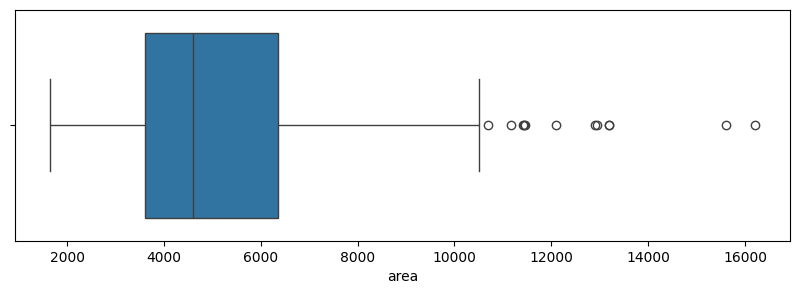

In [17]:
plt.figure(figsize=(10,3))
sns.boxplot(x=df['area'])
plt.show

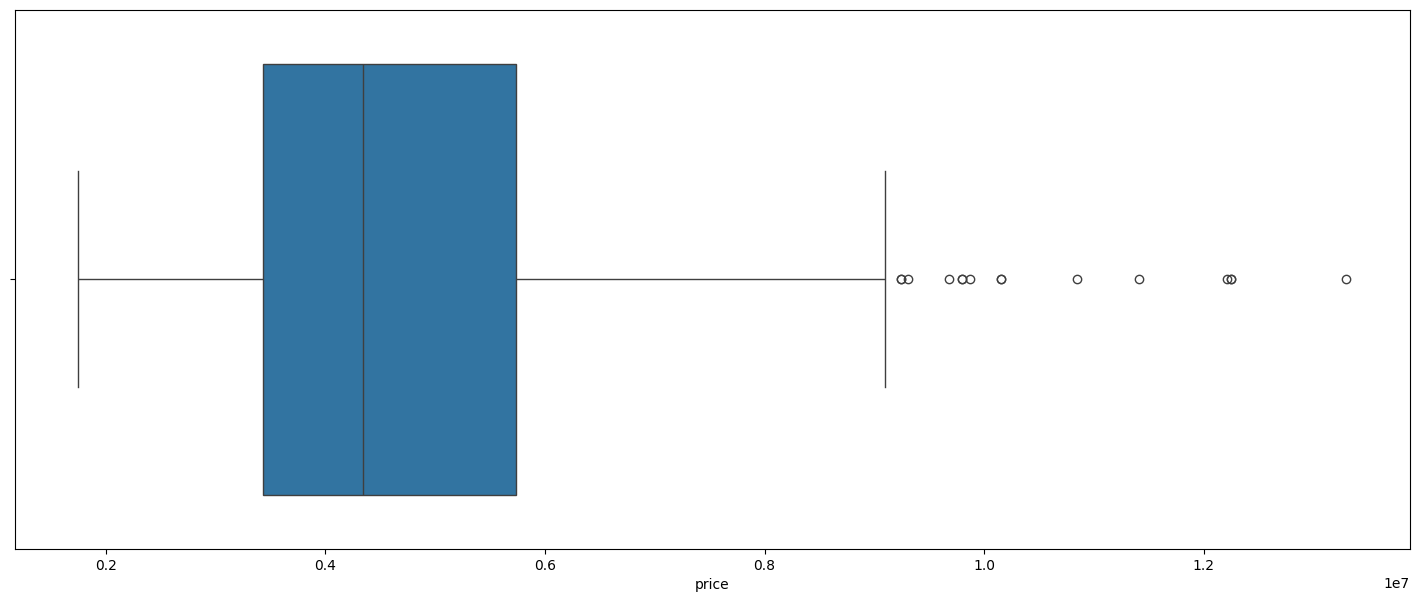

In [18]:
plt.figure(figsize=(18,7))
sns.boxplot(x=df['price'])
plt.show()

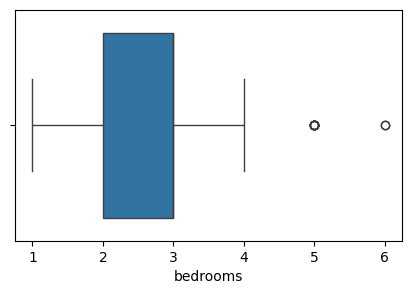

In [19]:
plt.figure(figsize=(5,3))
sns.boxplot(x=df['bedrooms'])
plt.show()

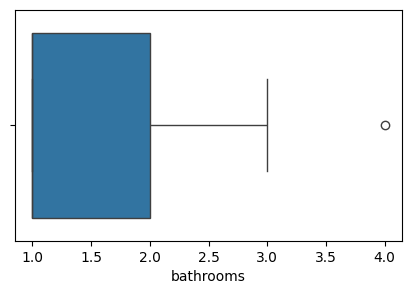

In [20]:
plt.figure(figsize=(5,3))
sns.boxplot(x=df['bathrooms'])
plt.show()

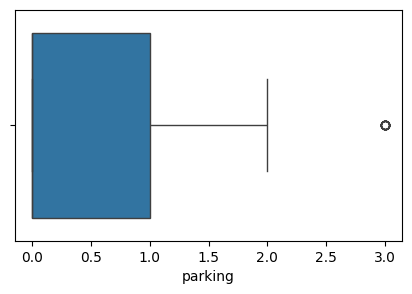

In [21]:
plt.figure(figsize=(5,3))
sns.boxplot(x=df['parking'])
plt.show()

now remove the outliers of the numerical columns


# remove the outliers

In [22]:
df[df['parking']>2.5].index                 # here we get the list of the outliers which we have to remove 

Index([1, 3, 47, 93, 225, 247, 299, 304, 323, 331, 401, 472], dtype='int64')

In [23]:
df.drop(index=[1, 3, 47, 93, 225, 247, 299, 304, 323, 331, 401, 472],inplace=True)   # drop The list of the ouliers from parking only 

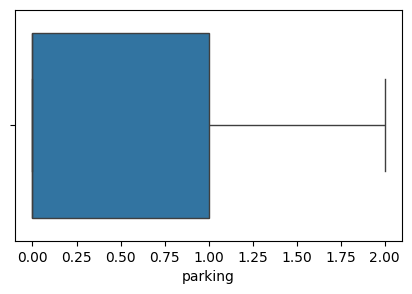

In [24]:
plt.figure(figsize=(5,3))                                     # to check that the outliers are remove or not again check by the boxplot
sns.boxplot(x=df['parking'])
plt.show()

for 'bathrooms' remove the outliers

In [25]:
df[df['bathrooms']>3.5].index

Index([], dtype='int64')

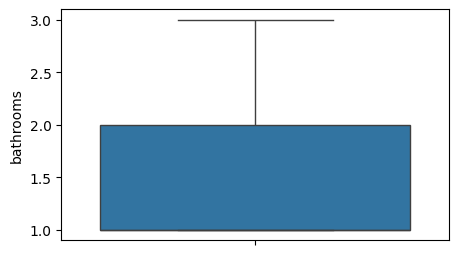

In [26]:
plt.figure(figsize=(5,3))
sns.boxplot(df['bathrooms'])
plt.show()

for bedrooms remove outliers

In [27]:
df[df['bedrooms']>4.5].index

Index([7, 28, 34, 89, 112, 143, 152, 271, 340, 356, 395, 536], dtype='int64')

In [28]:
df.drop(index=[28, 34, 89, 112, 143, 152, 271, 340, 356, 395, 536],inplace=True)

for price columns remove outliers

In [29]:
df[df['price']>8.8].index

Index([  0,   2,   4,   5,   6,   7,   8,   9,  10,  11,
       ...
       534, 535, 537, 538, 539, 540, 541, 542, 543, 544],
      dtype='int64', length=522)

In [30]:
df.drop(index=[ 14,  15,  16,  17,  18,  19,  20,  21,  22,  23, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533],inplace=True)

for "area" remove the outliers 

In [31]:
df[df['area']>9700].index

Index([  2,   7,  10,  56,  64,  66,  69,  82, 125, 129, 142, 146, 171, 175,
       186, 191, 211, 224, 252, 277, 403],
      dtype='int64')

In [32]:
df.drop(index=[  2,   7,  10,  56,  64,  66,  69,  82, 125, 129, 142, 146, 171, 175, 186, 191, 211, 224, 252, 277, 403],inplace=True)

# distplot to check skewness

In [33]:
import warnings
warnings.filterwarnings('ignore')

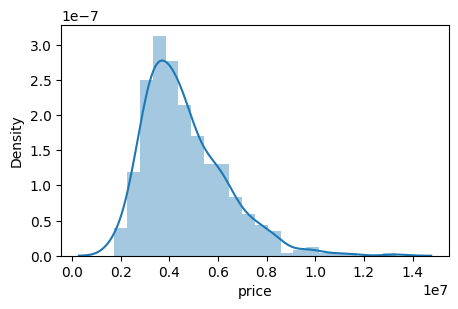

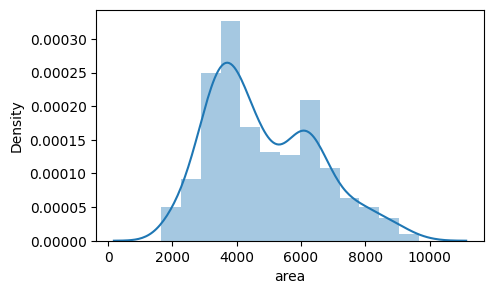

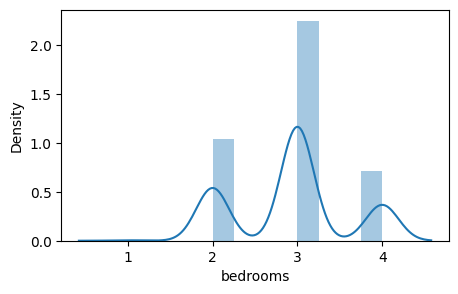

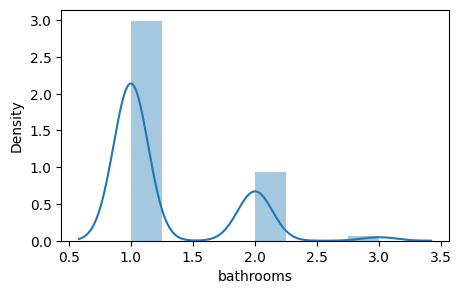

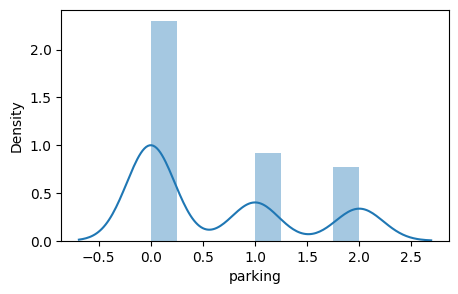

In [34]:
for col in num_col:
    plt.figure(figsize=(5,3))
    sns.distplot(df[col])
    plt.show()

skewness for the columns 

In [35]:
for col in num_col:
    print(f'{col:}',df[col].skew())                         # skewness for each numerical column


price 1.1732216791896284
area 0.5617818556809204
bedrooms 0.053498653930559956
bathrooms 1.4962359762908042
parking 0.7922873673694204


Now Manage the skewness with the help of "log " and "sqrt"

now we use Squreroot

In [36]:
for col in num_col:                                          # here we manage the skewness with sqrt method of skewness 
    if df[col].skew()>0.5:
            df[col]=np.sqrt(df[col])                                
            print(f'{col}',":",df[col].skew())

price : 0.624245184348583
area : 0.24003565626435694
bathrooms : 1.3513897293199322
parking : 0.458272827521996


# To check the skewness management we draw the distplot again

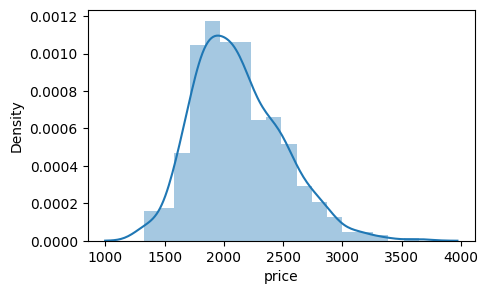

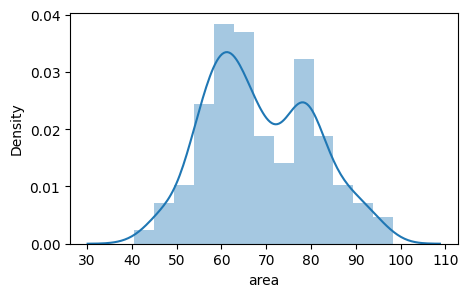

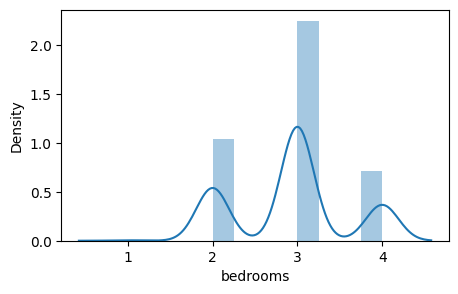

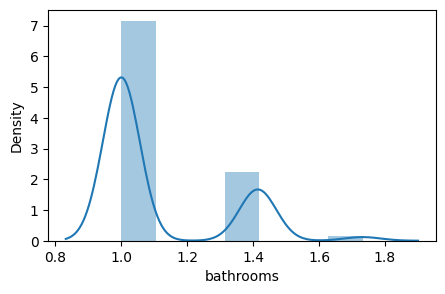

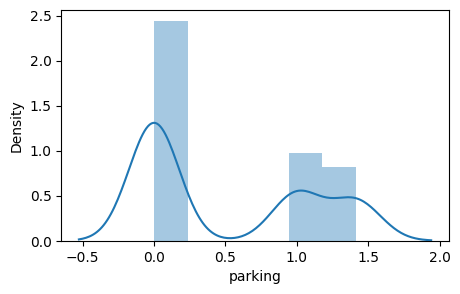

In [37]:
for col in num_col:
    plt.figure(figsize=(5,3))
    sns.distplot(df[col])
    plt.show()

# for cat_columns
# To check the counts in categorical columns we draw countplot 

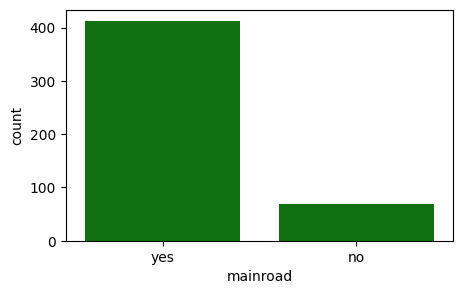

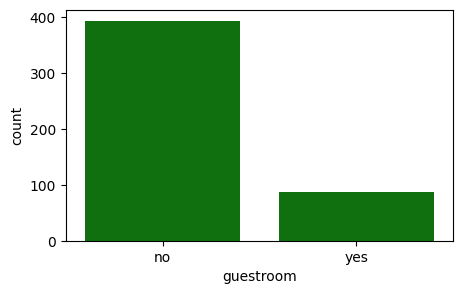

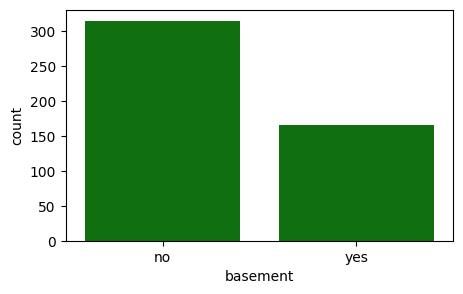

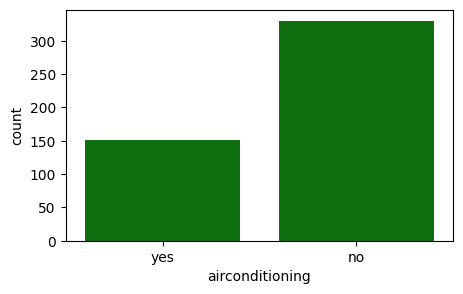

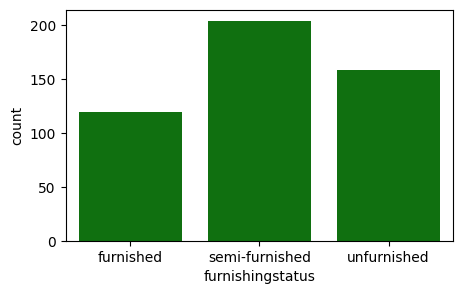

In [38]:
for col in cat_col:
    plt.figure(figsize=(5,3))
    sns.countplot(x=df[col],color='green')
    plt.show()

# Label encoding (to convert the cat_col in num_col)

In [39]:
cat_col

,mainroad,guestroom,basement,airconditioning,furnishingstatus
0,yes,no,no,yes,furnished
1,yes,no,no,yes,furnished
2,yes,no,yes,no,semi-furnished
3,yes,no,yes,yes,furnished
4,yes,yes,yes,yes,furnished
...,...,...,...,...,...
540,yes,no,yes,no,unfurnished
541,no,no,no,no,semi-furnished
542,yes,no,no,no,unfurnished
543,no,no,no,no,furnished


In [40]:
from sklearn.preprocessing import LabelEncoder

In [41]:
le=LabelEncoder()

In [42]:
# cat_col = pd.DataFrame(df)                    If we have change to the cat_col in num then first(for label encoding)

In [43]:
import warnings
warnings.filterwarnings("ignore")

In [44]:
for col in cat_col:                             #Now we can change cat_col table with label encoding
    x = df[col] = le.fit_transform(df[[col]])

In [45]:
cat_col.head(3)                                #categorical columns cannot change because we encoding in direct df in above query

,mainroad,guestroom,basement,airconditioning,furnishingstatus
0,yes,no,no,yes,furnished
1,yes,no,no,yes,furnished
2,yes,no,yes,no,semi-furnished


In [46]:
df.head()

,price,area,bedrooms,bathrooms,mainroad,guestroom,basement,airconditioning,parking,furnishingstatus
0,3646.916506,86.139422,4,1.414214,1,0,0,1,1.414214,0
4,3377.869151,86.139422,4,1.000000,1,1,1,1,1.414214,0
5,3293.933818,86.602540,3,1.732051,1,0,1,1,1.414214,1
6,3185.906464,92.628289,4,1.732051,1,0,0,1,1.414214,1
8,3141.655614,90.000000,4,1.000000,1,1,1,1,1.414214,0


In [47]:
df.iloc[0:3,7:9]

,airconditioning,parking
0,1,1.414214
4,1,1.414214
5,1,1.414214


Label Encoding using individually 

In [48]:
# df['mainroad']=le.fit_transform(df['mainroad'])
# df['guestroom']=le.fit_transform(df['guestroom'])
# df['basement']=le.fit_transform(df['basement'])
# df['airconditioning']=le.fit_transform(df['airconditioning'])
# df['furnishingstatus']=le.fit_transform(df['furnishingstatus'])

In [49]:
df.head(5)

,price,area,bedrooms,bathrooms,mainroad,guestroom,basement,airconditioning,parking,furnishingstatus
0,3646.916506,86.139422,4,1.414214,1,0,0,1,1.414214,0
4,3377.869151,86.139422,4,1.000000,1,1,1,1,1.414214,0
5,3293.933818,86.602540,3,1.732051,1,0,1,1,1.414214,1
6,3185.906464,92.628289,4,1.732051,1,0,0,1,1.414214,1
8,3141.655614,90.000000,4,1.000000,1,1,1,1,1.414214,0


# now to predict the target value with the help of (linearReg,Lasso,Ridge)

For Linear Regression

In [50]:
x=df.drop('price',axis=1)
y=df['price']

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
model=LinearRegression()

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [55]:
x_train.shape

(384, 9)

In [56]:
x_test.shape

(97, 9)

In [57]:
y_train.shape

(384,)

In [58]:
y_test.shape

(97,)

In [59]:
model.fit(x_train,y_train)

LinearRegression()

In [60]:
y_pred=model.predict(x_test)

In [61]:
y_pred

array([2436.88025542, 1977.2149783 , 1755.54452879, 2013.0172986 ,
       2306.12431112, 1838.31457493, 1680.43373774, 1866.39953539,
       2629.84011711, 2044.22607464, 2777.78093881, 2128.43601288,
       2138.84448586, 1810.58791441, 2227.42502366, 2427.27796894,
       2545.59679661, 1842.54771432, 2268.73613011, 2133.04775689,
       2446.00487851, 2194.05098657, 2462.6518096 , 2152.27342353,
       2178.10344712, 1637.84395252, 2095.56019769, 1913.92421661,
       1879.40224195, 2788.11162196, 2250.03647363, 2605.14725917,
       1819.21469517, 2328.15345373, 1701.03186198, 2057.18598815,
       1778.48987829, 2019.44417794, 1817.90052596, 2689.8722221 ,
       1939.5434728 , 2454.08671225, 2409.58160422, 1879.46403936,
       2823.42403637, 2008.05399154, 1883.85717569, 2035.08483822,
       2560.42974832, 2046.88572369, 1810.38477626, 1992.68979243,
       2030.61543336, 1738.96750873, 1558.42490326, 1721.78075216,
       2033.49296813, 2450.19222442, 1807.05619121, 2614.15149

In [62]:
model.score(x_test,y_test)

0.5586174350048096

In [63]:
model.score(x_train,y_train)

0.6510834345684002

# Now predict by Lasso L1


In [64]:
from sklearn.linear_model import Lasso,Ridge

In [65]:
l1=Lasso(alpha=1)

In [66]:
l1.fit(x_test,y_test)

Lasso(alpha=1)

In [67]:
y_pred=l1.predict(x_test)

In [68]:
y_pred

array([2488.2779685 , 1852.66146561, 1788.90326799, 2171.90550895,
       2301.08275387, 1815.04868701, 1729.24536936, 1765.38010165,
       2507.96931345, 2104.36024806, 2752.06629945, 2059.17753544,
       2233.35904992, 1801.85892158, 2134.83154518, 2473.62158504,
       2587.27435575, 1840.17080786, 2303.13862303, 2176.23281308,
       2451.14727345, 2129.28342341, 2347.04397594, 2092.06719715,
       2262.27147395, 1565.08836148, 2077.80820616, 1941.52591533,
       1758.49584136, 2771.41149676, 2282.23125284, 2605.00757634,
       1953.5867049 , 2306.50476062, 1742.51419961, 2113.44885777,
       1698.35302961, 2086.60485431, 1699.25857173, 2632.2152157 ,
       1951.84253345, 2504.91073523, 2379.02432716, 1871.1501533 ,
       2777.15434204, 2000.56074417, 1901.75118141, 2000.61939339,
       2612.41015028, 2147.41170641, 1805.58410989, 2044.8682651 ,
       2082.48444388, 1766.30284913, 1564.12102264, 1742.87114089,
       2129.15258117, 2389.84388744, 1791.78314315, 2531.26628

In [69]:
x_test.shape,y_test.shape

((97, 9), (97,))

In [70]:
l1.score(x_test,y_test)

0.5875793570802246

In [71]:
l1.score(x_train,y_train)

0.6137017125401762

In [72]:
x_test.head()

,area,bedrooms,bathrooms,mainroad,guestroom,basement,airconditioning,parking,furnishingstatus
98,81.240384,3,1.414214,1,0,0,1,0.000000,2
467,56.920998,3,1.000000,1,0,0,0,1.414214,1
444,55.856960,3,1.000000,0,0,0,0,0.000000,0
324,67.082039,3,1.000000,0,0,1,1,0.000000,1
452,94.868330,3,1.000000,1,0,0,0,1.414214,1


we cannot able to draw the graphs of the above model beacause x and has no of  features sp we are not able to draw 

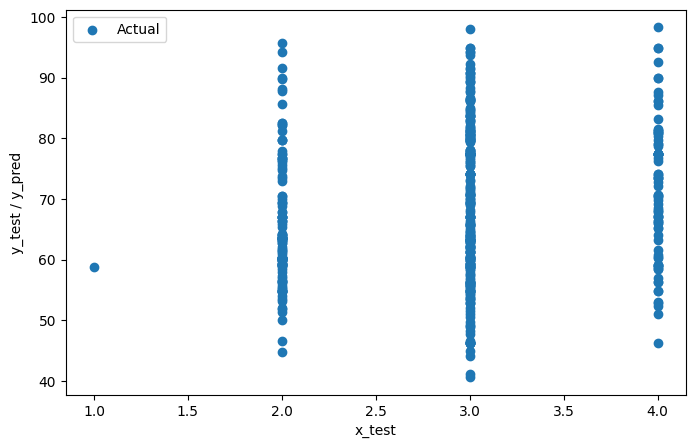

In [73]:
plt.figure(figsize=(8, 5))
plt.scatter(df['bedrooms'], df['area'], label='Actual')
#plt.plot(y_pred, color='red', label='Predicted')
plt.xlabel('x_test')
plt.ylabel('y_test / y_pred')
plt.legend()
plt.show()

In [74]:
x_train.shape

(384, 9)

In [75]:
y_test.shape

(97,)

In [76]:
y_train.shape

(384,)

In [77]:
df.head(5)

,price,area,bedrooms,bathrooms,mainroad,guestroom,basement,airconditioning,parking,furnishingstatus
0,3646.916506,86.139422,4,1.414214,1,0,0,1,1.414214,0
4,3377.869151,86.139422,4,1.000000,1,1,1,1,1.414214,0
5,3293.933818,86.602540,3,1.732051,1,0,1,1,1.414214,1
6,3185.906464,92.628289,4,1.732051,1,0,0,1,1.414214,1
8,3141.655614,90.000000,4,1.000000,1,1,1,1,1.414214,0


In [78]:
y

0      3646.916506
4      3377.869151
5      3293.933818
6      3185.906464
8      3141.655614
          ...     
540    1349.073756
541    1329.341942
542    1322.875656
543    1322.875656
544    1322.875656
Name: price, Length: 481, dtype: float64

In [79]:
x_test

,area,bedrooms,bathrooms,mainroad,guestroom,basement,airconditioning,parking,furnishingstatus
98,81.240384,3,1.414214,1,0,0,1,0.000000,2
467,56.920998,3,1.000000,1,0,0,0,1.414214,1
444,55.856960,3,1.000000,0,0,0,0,0.000000,0
324,67.082039,3,1.000000,0,0,1,1,0.000000,1
452,94.868330,3,1.000000,1,0,0,0,1.414214,1
...,...,...,...,...,...,...,...,...,...
281,67.082039,2,1.000000,1,0,0,1,1.414214,0
461,70.427267,2,1.000000,1,0,1,1,0.000000,2
42,80.498447,3,1.414214,1,0,0,1,1.414214,2
310,77.362782,3,1.000000,1,0,1,0,0.000000,1


In [80]:
y_test

98     2508.585259
467    1734.935157
444    1794.435844
324    2001.874122
452    1774.823935
          ...     
281    2066.397832
461    1754.992877
42     2774.887385
310    2032.240143
164    2321.637353
Name: price, Length: 97, dtype: float64

In [81]:
import pickle

In [82]:
with open("model.pkl","wb") as file:
    pickle.dump(model,file)